<a id='Q0'></a>
<center> <h1> Notebook 2: Exploring the Dataset: Zurich Air Quality </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><strong>Angela Niederberger, 2022</strong></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Short description of the aim of the notebook</p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#I'>Introduction </a> </li>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Part 1</a></li>
            <li> <a style="color:#303030" href='#P2'>Part 2</a></li>
            <li> <a style="color:#303030" href='#P3'>Part 3</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Keywords:</strong> data cleaning, NLP, ... list of keywords.
    </div>
</div>
</nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

Here you could write an introduction to the topics. Everything that is written here will appear in the live coding template notebook

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#import plotly.graph_objects as go
import os
import requests
import copy

### Magic Commands

In [2]:
#%load_ext lab_black
#%matplotlib inline
%config Completer.use_jedi = False

### Global Parameters Setting

In [46]:
plt.style.use("seaborn")
#sns.set_theme(style="ticks")

### User-Dependent Variables

In [4]:
data_path = "../data/raw"
os.getcwd()

'/home/angela/Documents/Python/bad_pandas/notebooks'

<a id='P1'></a>
## [Data Pre-processing](#P0)

Here you could write a paragraph on the aim of part one. You could also have some nice figures

### Data Cleaning

Datenquelle: https://data.stadt-zuerich.ch/dataset/ugz_luftschadstoffmessung_stundenwerte

In [5]:
filename = "ugz_ogd_air_h1_2021.csv"
df_raw = pd.read_csv(f'{data_path}/{filename}', sep=",")
df = copy.deepcopy(df_raw)

df.head()

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,CO,h1,mg/m3,0.44,provisorisch
1,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,SO2,h1,µg/m3,4.88,provisorisch
2,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,NOx,h1,ppb,29.46,provisorisch
3,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,NO,h1,µg/m3,9.85,provisorisch
4,2021-01-01T00:00+0100,Zch_Stampfenbachstrasse,NO2,h1,µg/m3,41.24,provisorisch


In [6]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210192 entries, 0 to 210191
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Datum      210192 non-null  object 
 1   Standort   210192 non-null  object 
 2   Parameter  210192 non-null  object 
 3   Intervall  210192 non-null  object 
 4   Einheit    210192 non-null  object 
 5   Wert       207230 non-null  float64
 6   Status     210192 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.2+ MB


In [7]:
# Change the date to datetime
df["Datum"] = pd.to_datetime(df["Datum"])

df.describe(include="all", datetime_is_numeric=True)  # Also show categorical data

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
count,210192,210192,210192,210192,210192,207230.000000,210192
unique,NaN,4,8,1,3,NaN,1
top,NaN,Zch_Stampfenbachstrasse,NOx,h1,µg/m3,NaN,provisorisch
freq,NaN,70064,35032,210192,166402,NaN,210192
mean,2021-07-02 10:30:00+01:00,NaN,NaN,NaN,NaN,21.357608,NaN
min,2021-01-01 00:00:00+01:00,NaN,NaN,NaN,NaN,-7.030000,NaN
25%,2021-04-02 05:00:00+01:00,NaN,NaN,NaN,NaN,5.370000,NaN
50%,2021-07-02 10:30:00+01:00,NaN,NaN,NaN,NaN,13.130000,NaN
75%,2021-10-01 16:00:00+01:00,NaN,NaN,NaN,NaN,29.580000,NaN
max,2021-12-31 21:00:00+01:00,NaN,NaN,NaN,NaN,218.950000,NaN


In [8]:
# Change strings to categories
df["Standort"] = df["Standort"].astype("category")
df["Parameter"] = df["Parameter"].astype("category")
df["Einheit"] = df["Einheit"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210192 entries, 0 to 210191
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype                               
---  ------     --------------   -----                               
 0   Datum      210192 non-null  datetime64[ns, pytz.FixedOffset(60)]
 1   Standort   210192 non-null  category                            
 2   Parameter  210192 non-null  category                            
 3   Intervall  210192 non-null  object                              
 4   Einheit    210192 non-null  category                            
 5   Wert       207230 non-null  float64                             
 6   Status     210192 non-null  object                              
dtypes: category(3), datetime64[ns, pytz.FixedOffset(60)](1), float64(1), object(2)
memory usage: 7.0+ MB


In [ ]:
pd.crosstab(df["Standort"], df["Parameter"])

Parameter,CO,NO,NO2,NOx,O3,PM10,PM2.5,SO2
Standort,,,,,,,,
Zch_Heubeeribüel,0,8758,8758,8758,8758,0,0,0
Zch_Rosengartenstrasse,0,8758,8758,8758,8758,8758,8758,0
Zch_Schimmelstrasse,0,8758,8758,8758,8758,8758,8758,0
Zch_Stampfenbachstrasse,8758,8758,8758,8758,8758,8758,8758,8758


## Exploratory Analysis

In [71]:
df_nox = df[df["Parameter"]=="NOx"].set_index("Datum")
df_nox.groupby("Standort", as_index=False)["Wert"].mean()

,Standort,Wert
0,Zch_Heubeeribüel,7.692983
1,Zch_Rosengartenstrasse,39.012162
2,Zch_Schimmelstrasse,29.768642
3,Zch_Stampfenbachstrasse,18.715506


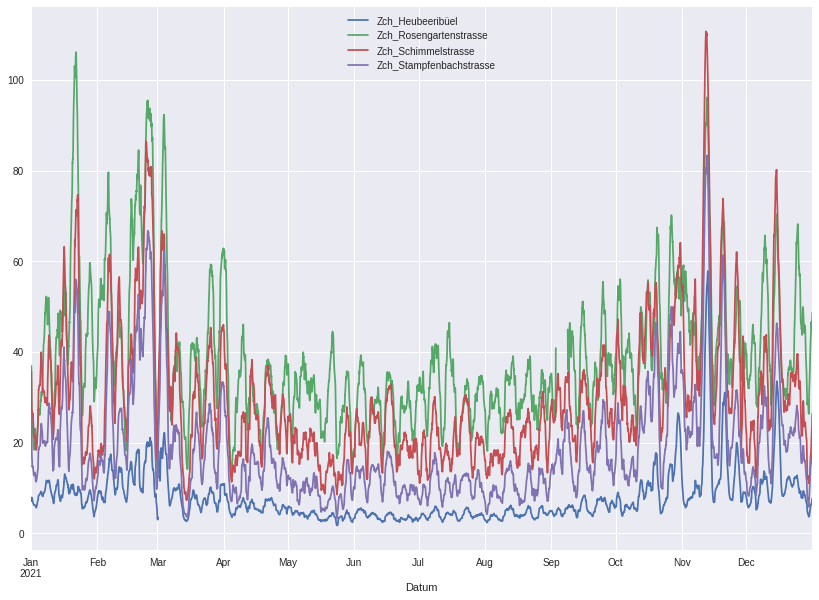

In [79]:
df_nox.groupby("Standort", as_index=False)["Wert"].rolling(48, min_periods=4).mean(). \
    groupby("Standort", as_index=False)["Wert"]. \
    plot(legend=True, figsize=(14, 10));


<div style="background:#EEEDF5;color:#303030"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    This Markdown cell is a template to write extended comments. e.g. explain the approach taken, or concepts behind algorithm chosen. Aim at having 2 lines at least. Anything smaller can be directly integrated in the code, or gathered together with other comments to form a bigger paragraph. Since this block is within a div element, you need to use html formatting syntax, not markdown
</div>

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        This is an example Blue Box
    </div>
</div>

<a id='P2' name="P2"></a>
## [Part 2 title here](#P0)

<a id='CL'></a>
## [Conclusion](#P0)

This is a pre-written conclusion in which we have nice figures.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>